In [1]:
%pylab inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from helper import get_colors

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pwd

/Users/ntokoven/Dropbox/_Education/_UvA/_Thesis/information-bottleneck


In [3]:
get_x, get_y = lambda x: x[0], lambda x: x[1]
colors = get_colors(4)
col = {'wd':colors[0], 'dout':colors[1], 'vib':colors[2], 'ceb':colors[3]}
def get_max_from_df(df):
    return df.apply(get_x).max(axis=0), df.apply(get_y).max(axis=0)

def get_mean_convergence(df, window=300):
    return df['X'][-window:].mean(axis=0), df['Y'][-window:].mean(axis=0)

In [4]:
!pwd

/Users/ntokoven/Dropbox/_Education/_UvA/_Thesis/information-bottleneck


In [5]:
date = '2007'
experiment_path = 'experiments_%s/' % date
if date == 2604:
    title = r'784->1024->1024->'+r'$\mathbf{1024}$'+r'->1024->256'
    print(title)
if date == 2104:
    title = r'784->1024->1024->'+r'$\mathbf{256}$'
    print(title)
if date == '0905':
    title = r'784->1024->1024->'+r'$\mathbf{256}$'+r'->64->64->10'
if date == '0506':
    title = r'784->1024->1024->'+r'$\mathbf{256}$'+r'->64->64->10'


experiment_path = 'experiments_2007/'
cifar10_title = 'VGG11'
mnist12k_title = r'784->1024->1024->'+r'$\mathbf{256}$'+r'->64->64->10'
print(experiment_path, title)

experiments_2007/ <function title at 0x113f02840>


In [129]:
def make_mie_df(vals, dataset, layers, reg_type, comment=''):
    mie_df = pd.DataFrame(columns=layers)
    if reg_type == 'wd':
        folder = dataset+'/wd'
    elif reg_type == 'dout':
        folder = dataset+'/dropout'
    elif reg_type == 'vib':
        folder = dataset+'/vib'
    elif reg_type == 'ceb' or reg_type == 'cvib':
        folder = dataset+'/ceb'

    for val in vals:
        try:
            if comment != '':
                path = experiment_path + 'mie/%s/%s/%s' % (folder, str(val), comment)
            else:
                path = experiment_path + 'mie/%s/%s' % (folder, str(val))
#             path += '/mie_max_values'
            path += '/mie_train_values'
            f_names = sort(os.listdir(path))
            for j in range(len(f_names)):
                #if f_names[j] != '.DS_Store':
                    #for layer in layers:
#                         name = re.findall('Linear%d' % layer, f_names[j])
#                         print(name)
#                         if len(name) > 0:
#                             name = name[0]
#                             layer = int(re.sub('\D', '', name))

#                 res_str = pd.Series.from_csv(path+'/'+f_names[j], sep=' ')['Linear0']
#                 mie_df.loc[val, 2] = [float(_) for _ in re.sub('[(]|[)]', '', res_str).split(', ')]
                res_str = get_mean_convergence(pd.DataFrame.from_csv(path+'/'+f_names[j], sep=' '))
                #if res_str[0] > 0.1:
                mie_df.loc[val, 2] = res_str
                #else:
                #    pass
        except FileNotFoundError:
            print('MIE experiment for %s with %s (%s) for %s is missing' % (comment, reg_type, val, dataset))
    print(mie_df)
#     return get_mean_convergence(mie_df)
    return mie_df

def make_abc_df(vals, dataset, layers, reg_type, comment=''):
    abc_df = pd.DataFrame(columns=layers)
    if reg_type == 'wd':
        folder = dataset+'/wd'
    elif reg_type == 'dout':
        folder = dataset+'/dropout'
    elif reg_type == 'vib':
        folder = dataset+'/vib'
    elif reg_type == 'ceb' or reg_type == 'cvib':
        folder = dataset+'/ceb'
    path = experiment_path + 'results/%s/abc_values/' % dataset
    f_names = sort(os.listdir(path))
    for j in range(len(f_names)):
        if f_names[j] != '.DS_Store':
            for val in vals:
#                 if comment != '':
#                     path += '/%s/%s' % (str(val), comment)
#                 else:
#                     path += '/%s' % str(val)
                for layer in layers:
#                     target_name = re.compile(r'%s_{[0-9]}_%s' % (reg_type, val))
                    for num in range(0, len(vals)):
                        if comment != '':
                            final_path = path+r'%s_%s_{%d}_%s.csv' % (reg_type, comment, num, val)
                        else:
                            final_path = path+r'%s_{%d}_%s.csv' % (reg_type, num, val)
                        if os.path.exists(final_path):
                            name = final_path
                            try:
                                a = pd.DataFrame.from_csv(name, index_col=0, sep=' ').iloc[0]['Linear%d'%layer]
                                b = pd.DataFrame.from_csv(name, index_col=0, sep=' ').iloc[1]['Linear%d'%layer]
                                abc_df.loc[val, layer] = (a, b)
                            except:
                                a = pd.DataFrame.from_csv(name, index_col=0, sep=' ').iloc[0]['Linear0']
                                b = pd.DataFrame.from_csv(name, index_col=0, sep=' ').iloc[1]['Linear0']
                                abc_df.loc[val, layer] = (a, b)
    return abc_df

# def information_plane(mi_df, dataset, abc_df, reg_type, fig, ax, folder='information_planes',c=False, final_c=False, name=False, loc=False, title=False, comment='', tog=False):
#     params_vals = mi_df.index.values
#     layers = mi_df.columns.values
#     colors = get_colors(len(layers))
#     set_legend = True
#     for j in range(len(layers)):
#         l = layers[j]
#         for i in range(len(params_vals)):
#             #try:
#                 p = params_vals[i]
#                 if set_legend:
#                     if folder == 'gap':
#                         ax.bar(p, mi_df.loc[p, l][0] - mi_df.loc[p, l][1], color=c if c else colors[l], label='reg_type=%s %s' % (reg_type, comment))
#                     else:
#                         ax.scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=c if c else colors[l], label='reg_type=%s %s' % (reg_type, comment))
#                     ax.legend(loc=loc if loc else 'best')#4)
#                 else:
#                     if folder == 'gap':
#                         ax.bar(p, mi_df.loc[p, l][0] - mi_df.loc[p, l][1], color=c if c else colors[l])
#                     else:
#                         ax.scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=c if c else colors[l])
#                 if folder == 'gap':
#                     ax.annotate('(%s, (%.3f, %.3f))' % (p, abc_df.loc[p, l][0], abc_df.loc[p, l][1]), (p, mi_df.loc[p, l][0]+0.1 - mi_df.loc[p, l][1]))
#                 else:
#                     ax.annotate('(%s, (%.3f, %.3f))' % (p, abc_df.loc[p, l][0], abc_df.loc[p, l][1]), (mi_df.loc[p, l][0]+0.02, mi_df.loc[p, l][1]))
#     #             ax.annotate('%s %s' % (reg_type, p), (mi_df.loc[p, l][0]+0.01, mi_df.loc[p, l][1]-0.0075))
#                 ax.grid()
#                 set_legend = False
#             #except KeyError:
                
#                 #print('GC experiment for %s with %s (%s) is missing' % (comment, reg_type, p))
#         if not c:
#             set_legend = True
#         if folder != 'gap':
#             ax.plot(mi_df[l].apply(get_x).values, mi_df[l].apply(get_y).values, color=c if c else colors[l])
#         ax.set_title(title if title else reg_type+' (param_val, ABC)')

#     fig.text(0.5, 0.04, 'I(X, Z)', ha='center')
#     fig.text(0.04, 0.5, 'I(Z, Y)', va='center', rotation='vertical')
#     fig.set_size_inches(10, 7, forward=True)
#     if not os.path.exists(experiment_path+'results/%s/%s' % (dataset, folder)):
#         os.makedirs(experiment_path+'results/%s/%s' % (dataset, folder))
#     fig.show()
#     if comment != '':
#         fig.savefig(experiment_path+'results/%s/%s/%s%s.png' % (dataset, folder, name if name else reg_type, '_'+comment if not tog else ''))
#     else:
#         fig.savefig(experiment_path+'results/%s/%s/%s.png' % (dataset, folder, name if name else reg_type))
#     print('saved information plane')
#     return fig, ax

def information_plane(mi_df, dataset, abc_df, reg_type, fig, ax, folder='information_planes',c=False, final_c=False, name=False, loc=False, title=False, comment='', tog=False):
    params_vals = mi_df.index.values
    layers = mi_df.columns.values
    colors = get_colors(len(layers))
    set_legend = True
    for j in range(len(layers)):
        l = layers[j]
        for i in range(len(params_vals)):
            #try:
                p = params_vals[i]
                if set_legend:
                    if folder == 'gap':
                        ax.bar(p, mi_df.loc[p, l][0] - mi_df.loc[p, l][1], color=final_c.loc[p].hex, label='reg_type=%s %s' % (reg_type, comment))
                    else:
                        print(type(final_c.loc[p]))
                        ax.scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=final_c.loc[p].hex, label='reg_type=%s %s' % (reg_type, comment))
                    ax.legend(loc=loc if loc else 'best')#4)
                else:
                    if folder == 'gap':
                        ax.bar(p, mi_df.loc[p, l][0] - mi_df.loc[p, l][1], color=final_c.loc[p].hex)
                    else:
                        ax.scatter(mi_df.loc[p, l][0], mi_df.loc[p, l][1], color=final_c.loc[p].hex)
                if folder == 'gap':
                    ax.annotate('(%s, (%.3f, %.3f))' % (p, abc_df.loc[p, l][0], abc_df.loc[p, l][1]), (p, mi_df.loc[p, l][0]+0.1 - mi_df.loc[p, l][1]))
                else:
                    ax.annotate('(%s, (%.3f, %.3f))' % (p, abc_df.loc[p, l][0], abc_df.loc[p, l][1]), (mi_df.loc[p, l][0]+0.02, mi_df.loc[p, l][1]))
    #             ax.annotate('%s %s' % (reg_type, p), (mi_df.loc[p, l][0]+0.01, mi_df.loc[p, l][1]-0.0075))
                ax.grid()
                set_legend = False
            #except KeyError:
                
                #print('GC experiment for %s with %s (%s) is missing' % (comment, reg_type, p))
        if not c:
            set_legend = True
        if folder != 'gap':
            ax.plot(mi_df[l].apply(get_x).values, mi_df[l].apply(get_y).values)#, color=c if c else colors[l])
        ax.set_title(title if title else reg_type+' (param_val, ABC)')

    fig.text(0.5, 0.04, 'I(X, Z)', ha='center')
    fig.text(0.04, 0.5, 'I(Z, Y)', va='center', rotation='vertical')
    fig.set_size_inches(10, 7, forward=True)
    if not os.path.exists(experiment_path+'results/%s/%s' % (dataset, folder)):
        os.makedirs(experiment_path+'results/%s/%s' % (dataset, folder))
    fig.show()
    if comment != '':
        fig.savefig(experiment_path+'results/%s/%s/%s%s.png' % (dataset, folder, name if name else reg_type, '_'+comment if not tog else ''))
    else:
        fig.savefig(experiment_path+'results/%s/%s/%s.png' % (dataset, folder, name if name else reg_type))
    print('saved information plane')
    return fig, ax

def build(vals, dataset, reg_type, comment='', name=False, tog=False):
    if dataset == 'cifar10':
        title = cifar10_title
    elif dataset == 'mnist12k':
        title = mnist12k_title
        
    abc = make_abc_df(vals, dataset, layers, reg_type, comment=comment)
    mie = make_mie_df(vals, dataset, layers, reg_type, comment=comment)
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
    _ = information_plane(mie, dataset, abc, reg_type, fig, ax, c=col['wd'], name=name, title=title, comment=comment, tog=tog)
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
    _ = information_plane(do_mie, 'cifar10', do_abc, 'dout', fig, ax, folder='gap', c=col['wd'], name=name, title=title, comment=comment, tog=tog)
    return fig, ax

def transform(val_a, val_b, maximum=2.980196957073414, minimum=0):
    val_a = val_a / maximum * 100
    val_b = val_b / maximum * 100
    return val_a, val_b


    
              

In [130]:
wd_abc

,2
0,"(5.618186868686847, 34.88985353535353)"
1e-7,"(4.071378787878787, 32.53982323232323)"
1e-6,"(4.187166666666688, 32.246833333333335)"
1e-5,"(2.8337424242424256, 30.409964646464633)"
1e-4,"(0.0, 99.99999999999999)"


In [131]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),101))
colors

val_max = 1
all_max = 100

quantization = np.linspace(0, 10, 101)
colors_vals = pd.Series(index=wd_abc.index)
print(colors_vals)
print(quantization)
for i in wd_abc.index.values:
    print(wd_abc.loc[i, 2][0])
    for j in range(len(quantization) - 1):
        if wd_abc.loc[i, 2][0] > quantization[j] and wd_abc.loc[i, 2][0] <= quantization[j+1]:
            print('am here', quantization[j])
            colors_vals.loc[i] = quantization[j]
            
colors_vals = colors_vals.fillna(0)
    
# np.wherequantization

0      NaN
1e-7   NaN
1e-6   NaN
1e-5   NaN
1e-4   NaN
dtype: float64
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
5.618186868686847
am here 5.6000000000000005
4.071378787878787
am here 4.0
4.187166666666688
am here 4.1000000000000005
2.8337424242424256
am here 2.8000000000000003
0.0


In [132]:
colors_vals.fillna(0)

0       5.6
1e-7    4.0
1e-6    4.1
1e-5    2.8
1e-4    0.0
dtype: float64

In [133]:
final_colors = colors_vals.apply(lambda x: int(x*10)).apply(lambda x: colors[x])



/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


MIE experiment for stoch with wd (5e-4) for cifar10 is missing
MIE experiment for stoch with wd (1e-3) for cifar10 is missing
MIE experiment for stoch with wd (5e-3) for cifar10 is missing
                                                    2
0             (5.653499208168819, 2.3189171507674406)
1e-7          (5.216211574556623, 2.2970935697755914)
1e-6          (5.487209976265691, 2.3168571576139283)
1e-5           (5.608464185253901, 2.308697187563747)
5e-5  (-3.664394879955994e-05, -9.02934364288168e-06)
1e-4          (6.3803476970629385, 2.226544898772738)
5.618186868686847
am here 5.6000000000000005
4.071378787878787
am here 4.0
4.187166666666688
am here 4.1000000000000005
2.8337424242424256
am here 2.8000000000000003
0.0
0       #a2b800
1e-7    #cca300
1e-6    #cba600
1e-5    #db7b00
1e-4        red
dtype: object
<class 'colour.Color'>


/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

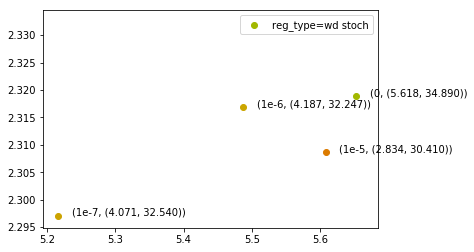

In [134]:
#Weight decay and dropout 
layers = [2]#[0, 1, 2]
#colors = get_colors(4)
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),101))
colors
col = {'wd':colors[0], 'dout':colors[1], 'vib':colors[2], 'ceb':colors[3]}
# wd_vals = ['0', '1e-7', '1e-6', '75e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '1e-2', '5e-2']
wd_vals = ['0', '1e-7', '1e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3']#, '1e-2', '5e-2']


wd_abc = make_abc_df(wd_vals, 'cifar10', layers, 'wd', comment='stoch')
wd_mie = make_mie_df(wd_vals, 'cifar10', layers, 'wd', comment='stoch')
wd_abc = wd_abc.drop(index='5e-5')
wd_mie = wd_mie.drop(index='5e-5')
for i in wd_abc.index.values:
    tmp = wd_abc.loc[i, 2]
    wd_abc.loc[i, 2] = transform(tmp[0], tmp[1])

quantization = np.linspace(0, 10, 101)
colors_vals = pd.Series(index=wd_abc.index)

for i in wd_abc.index.values:
    print(wd_abc.loc[i, 2][0])
    for j in range(len(quantization) - 1):
        if wd_abc.loc[i, 2][0] > quantization[j] and wd_abc.loc[i, 2][0] <= quantization[j+1]:
            print('am here', quantization[j])
            colors_vals.loc[i] = quantization[j]
final_colors = colors_vals.apply(lambda x: int(x*10)).apply(lambda x: colors[x])
print(final_colors)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(wd_mie, 'cifar10', wd_abc, 'wd', fig, ax, c=col['wd'], final_c=final_colors, title=cifar10_title, comment='stoch')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(wd_mie, 'cifar10', wd_abc, 'wd', fig, ax, folder='gap', c=col['wd'], title=cifar10_title, comment='stoch')
# del(wd_abc)
# del(wd_mie)

# wd_abc = make_abc_df(wd_vals, 'cifar10', layers, 'wd', comment='determ')
# wd_mie = make_mie_df(wd_vals, 'cifar10', layers, 'wd', comment='determ')
# for i in wd_abc.index.values:
#     tmp = wd_abc.loc[i, 2]
#     wd_abc.loc[i, 2] = transform(tmp[0], tmp[1])
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'cifar10', wd_abc, 'wd', fig, ax, c=col['dout'], title=cifar10_title, comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'cifar10', wd_abc, 'wd', fig, ax, folder='gap', c=col['dout'], title=cifar10_title, comment='determ')
# del(wd_abc)
# del(wd_mie)

# wd_abc = make_abc_df(wd_vals, 'mnist12k', layers, 'wd', comment='stoch')
# wd_mie = make_mie_df(wd_vals, 'mnist12k', layers, 'wd', comment='stoch')
# for i in wd_abc.index.values:
#     tmp = wd_abc.loc[i, 2]
#     wd_abc.loc[i, 2] = transform(tmp[0], tmp[1])
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, c=col['wd'], title=mnist12k_title, comment='stoch')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='stoch')
# del(wd_abc)
# del(wd_mie)


# wd_abc = make_abc_df(wd_vals, 'mnist12k', layers, 'wd', comment='determ')
# wd_mie = make_mie_df(wd_vals, 'mnist12k', layers, 'wd', comment='determ')
# for i in wd_abc.index.values:
#     tmp = wd_abc.loc[i, 2]
#     wd_abc.loc[i, 2] = transform(tmp[0], tmp[1])
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, c=col['dout'], title=mnist12k_title, comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='determ')

In [128]:
final_colors.loc['1e-4'].hex

'#f00'

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: 

MIE experiment for stoch with dout (0.45) for cifar10 is missing
MIE experiment for stoch with dout (0.6) for cifar10 is missing
MIE experiment for stoch with dout (0.75) for cifar10 is missing
                                             2
0       (8.70040597409548, 2.2636571916951986)
0.1     (8.018866675807981, 2.273020681978859)
0.2      (8.20361905250341, 2.283794878704822)
0.325  (6.558202477289117, 2.2088749170620305)
0.4    (6.158016605363612, 2.2615783715525453)
0.475  (6.186517700827189, 2.2504256187601537)
saved information plane
saved information plane
MIE experiment for determ with dout (0.45) for cifar10 is missing
MIE experiment for determ with dout (0.6) for cifar10 is missing
MIE experiment for determ with dout (0.75) for cifar10 is missing
                                              2
0      (4.7817385052713375, 2.2835901823444575)
0.1     (5.1172163942674205, 2.237388827899807)
0.2     (4.810917682936392, 2.0979048102941276)
0.325   (4.577608504633988, 1.8692343207

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


MIE experiment for stoch with dout (0.4) for mnist12k is missing
MIE experiment for stoch with dout (0.475) for mnist12k is missing
                                             2
0        (9.08205829298213, 2.302764648549139)
0.1    (8.548473922799504, 2.3007989878692325)
0.2    (8.710162265683932, 2.3004726663965083)
0.325   (8.426730255091941, 2.299172791765321)
0.45   (8.547747618811474, 2.3009254744388747)
0.6     (8.623024655301421, 2.299825108943004)
0.75   (7.793144441161837, 2.2867883713661667)
saved information plane
saved information plane
MIE experiment for determ with dout (0.4) for mnist12k is missing
MIE experiment for determ with dout (0.475) for mnist12k is missing
                                              2
0       (6.566880129131058, 2.3040218695596093)
0.1      (6.857159304564434, 2.303940120154904)
0.2    (6.5625232511652385, 2.3026055607861937)
0.325   (6.413990142094712, 2.3024883471760482)
0.45     (5.954573684728573, 2.301802107741435)
0.6      (5.1520730231

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1033f1780>)

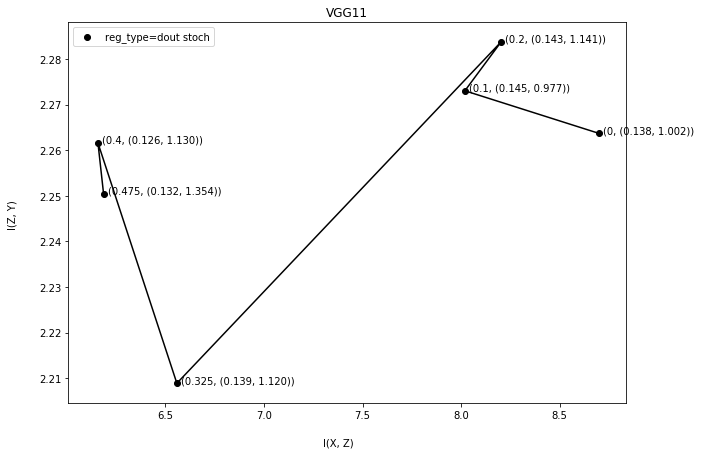

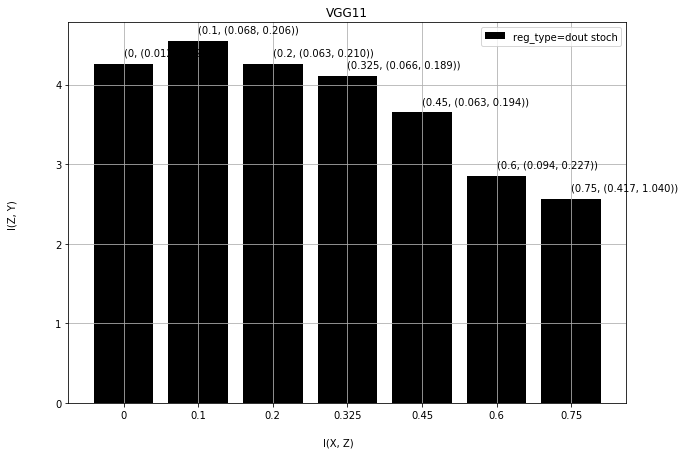

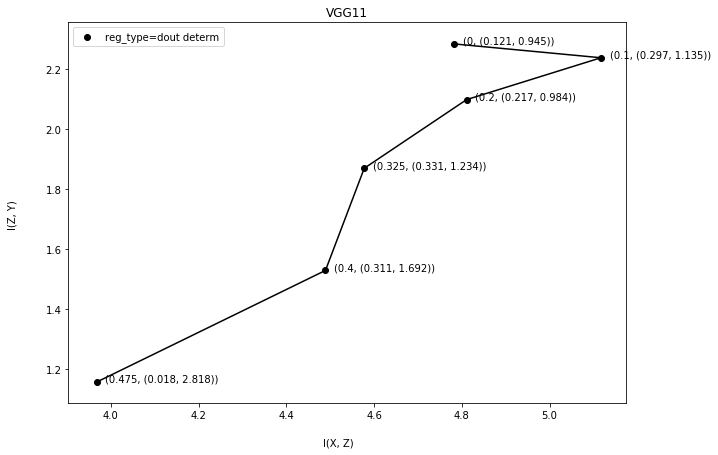

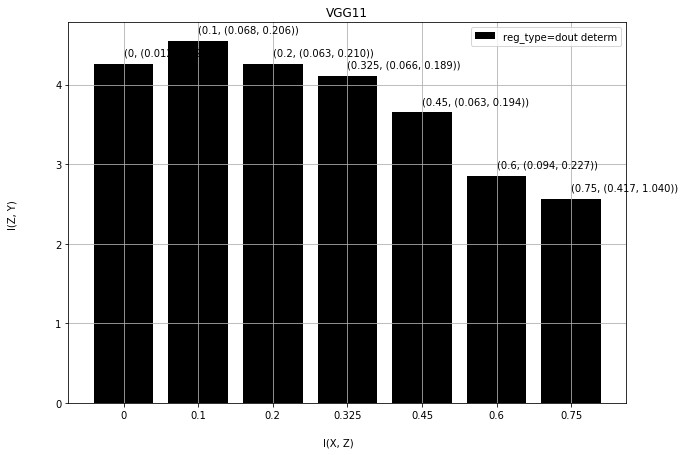

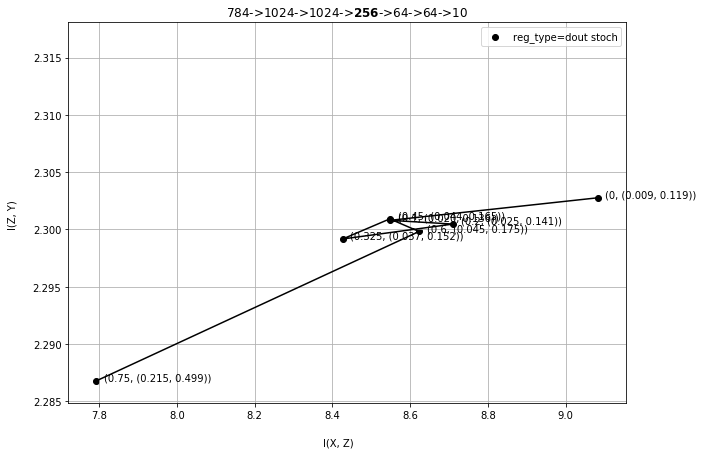

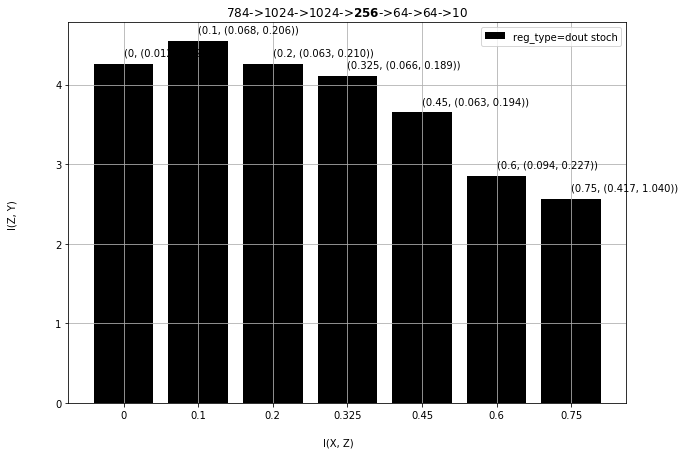

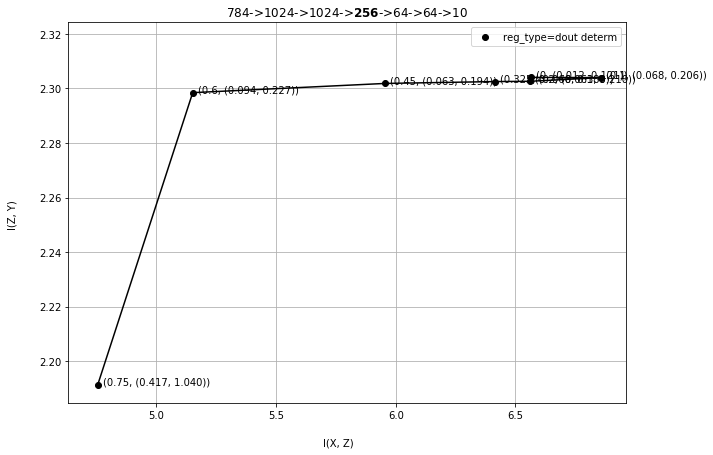

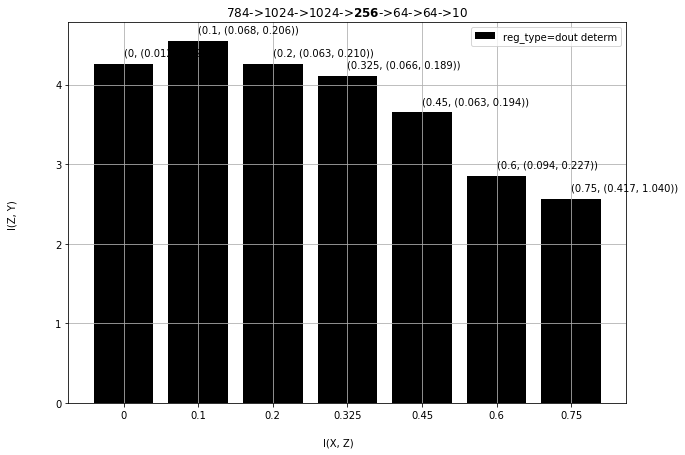

In [223]:
#Dropout 
layers = [2]#[0, 1, 2]
colors = get_colors(4)
col = {'wd':colors[0], 'dout':colors[1], 'vib':colors[2], 'ceb':colors[3]}

dout_vals = ['0', '0.1', '0.2', '0.325', '0.4', '0.45', '0.475', '0.6', '0.75'] 


build(dout_vals, 'cifar10', 'dout', comment='stoch')
build(dout_vals, 'cifar10', 'dout', comment='determ')

build(dout_vals, 'mnist12k', 'dout', comment='stoch', name='test')
build(dout_vals, 'mnist12k', 'dout', comment='determ', name='test')

# do_abc = make_abc_df(do_vals, 'cifar10', layers, 'dout', comment='stoch')
# do_mie = make_mie_df(do_vals, 'cifar10', layers, 'dout', comment='stoch')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'cifar10', do_abc, 'dout', fig, ax, c=col['wd'], title=cifar10_title, comment='stoch')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'cifar10', do_abc, 'dout', fig, ax, folder='gap', c=col['wd'], title=cifar10_title, comment='stoch')
# del(do_abc)
# del(do_mie)

# do_abc = make_abc_df(do_vals, 'cifar10', layers, 'dout', comment='determ')
# do_mie = make_mie_df(do_vals, 'cifar10', layers, 'dout', comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'cifar10', do_abc, 'dout', fig, ax, c=col['dout'], title=cifar10_title, comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'cifar10', do_abc, 'dout', fig, ax, folder='gap', c=col['dout'], title=cifar10_title, comment='determ')
# del(do_abc)
# del(do_mie)

# do_abc = make_abc_df(do_vals, 'mnist12k', layers, 'dout', comment='stoch')
# do_mie = make_mie_df(do_vals, 'mnist12k', layers, 'dout', comment='stoch')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'mnist12k', do_abc, 'dout', fig, ax, c=col['wd'], title=mnist12k_title, comment='stoch')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'mnist12k', do_abc, 'dout', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='determ')
# del(do_abc)
# del(do_mie)


# do_abc = make_abc_df(do_vals, 'mnist12k', layers, 'dout', comment='determ')
# do_mie = make_mie_df(do_vals, 'mnist12k', layers, 'dout', comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'mnist12k', do_abc, 'dout', fig, ax, c=col['dout'], title=mnist12k_title, comment='determ')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(do_mie, 'mnist12k', do_abc, 'dout', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='determ')


/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: 

MIE experiment for  with vib (1e-2) for cifar10 is missing
MIE experiment for  with vib (5e-2) for cifar10 is missing
MIE experiment for  with vib (1e-1) for cifar10 is missing
                                             2
0        (7.61392553688539, 2.283591407766139)
1e-8     (8.121399255653051, 2.28880367553585)
1e-7    (6.805568491664251, 2.294384815378744)
1e-6    (5.168762767144672, 2.291365798535737)
1e-5   (4.279155745226517, 2.2777798457329097)
5e-5    (3.883256635526932, 2.280430927535296)
1e-4   (3.7605422682883263, 2.273828227627538)
5e-4  (3.2732647248129685, 2.2472897575757442)
1e-3   (3.291549939066243, 2.2581444934035972)
5e-3   (3.141268636169229, 2.1881644558136744)
saved information plane
saved information plane


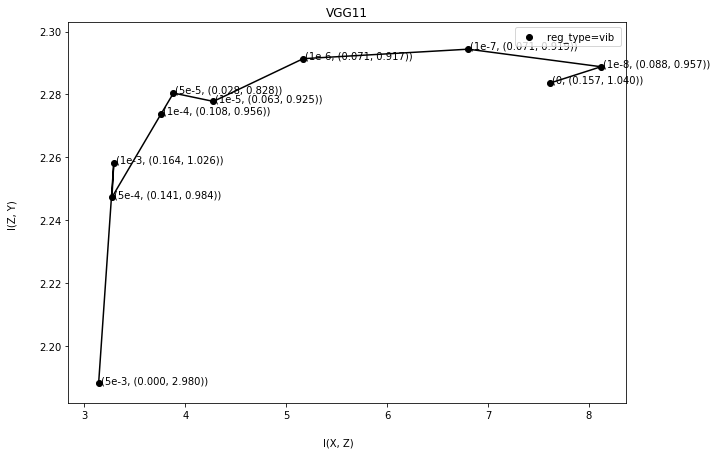

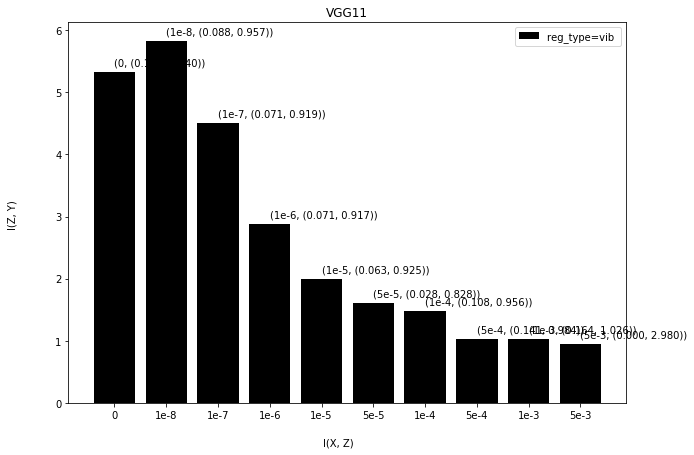

In [237]:
#VIB

layers = [2]
# ceb_vals = ['0', '1e-10', '1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '5e-1']#, '1e-0']
# ceb_vals = ['0', '1e-10', '1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '5e-1']#, '1e-0']
# ceb_vals = ['0', '1e-10', '1e-9', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '5e-2', '1e-1', '5e-1', '1', '5']

# ceb_vals = ['0', '1e-8', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '5e-3', '5e-3']#, '1e-2', '5e-2', '1e-1', '5e-1', '1', '5']

# cvib_vals = ['1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '5e-2', '1e-1', '5e-1', '1', '5']

# vib_vals = ['0', '1e-8', '1e-7', '1e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '5875e-6', '1e-2', '5e-2', '1e-1', '5e-1', '1'] 
vib_vals = ['0', '1e-8', '1e-7', '1e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '1e-2', '5e-2', '1e-1']#, '5e-1', '1'] 

vib_abc = make_abc_df(vib_vals, 'cifar10', layers, 'vib')
vib_mie = make_mie_df(vib_vals, 'cifar10', layers, 'vib')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(vib_mie, 'cifar10', vib_abc, 'vib', fig, ax, c=col['wd'], title=cifar10_title)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(vib_mie, 'cifar10', vib_abc, 'vib', fig, ax, folder='gap', c=col['wd'], title=cifar10_title)
# del(vib_abc)
# del(vib_mie)



# vib_abc = make_abc_df(vib_vals, 'mnist12k', layers, 'vib')
# vib_mie = make_mie_df(vib_vals, 'mnist12k', layers, 'vib')
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(vib_mie, 'mnist12k', vib_abc, 'vib', fig, ax, c=col['wd'], title=mnist12k_title)
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# _ = information_plane(vib_mie, 'mnist12k', vib_abc, 'vib', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title)
# del(vib_abc)
# del(vib_mie)

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: 

MIE experiment for unit with ceb (1e-2) for cifar10 is missing
MIE experiment for unit with ceb (5e-2) for cifar10 is missing
MIE experiment for unit with ceb (1e-1) for cifar10 is missing
                                            2
0      (8.631749499647933, 2.276894659402817)
1e-8   (8.311480691186762, 2.294242573204996)
1e-7  (6.056280671959816, 2.2890026590191286)
1e-6   (4.640843732111361, 2.278211324016253)
1e-5  (3.8332142757513346, 2.276479281191021)
5e-5  (3.327712958120836, 2.2731714026829457)
1e-4  (3.4800880811241024, 2.264643917350347)
5e-4  (3.298609888155125, 2.2544399635053667)
1e-3   (2.99408041996784, 2.2634155024473483)
5e-3    (2.79070595520613, 2.178717729881167)
saved information plane
saved information plane
MIE experiment for learnt with ceb (1e-2) for cifar10 is missing
MIE experiment for learnt with ceb (5e-2) for cifar10 is missing
MIE experiment for learnt with ceb (1e-1) for cifar10 is missing
                                             2
0      (8.79597

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


MIE experiment for unit with ceb (5e-5) for mnist12k is missing
MIE experiment for unit with ceb (5e-4) for mnist12k is missing
                                             2
0       (8.876827974636397, 2.301025161684032)
1e-8    (6.326220799154708, 2.301072933035237)
1e-7     (4.72867184793843, 2.302526713815473)
1e-6  (2.4939480044184235, 2.3033141548529468)
1e-5   (3.1621085087978646, 2.295712174588725)
1e-4  (2.3763718011998933, 2.3029046751227638)
1e-3    (2.360418114179655, 2.298483924290963)
5e-3   (2.371773478055285, 2.2958077348366595)
1e-2  (2.3834166117343627, 2.2898237618070754)
5e-2  (2.3694928734595826, 2.2901221401752947)
1e-1   (2.343815967691323, 2.2822259324150425)
saved information plane
saved information plane
MIE experiment for learnt with ceb (5e-5) for mnist12k is missing
MIE experiment for learnt with ceb (5e-4) for mnist12k is missing
                                             2
0       (8.835573305435599, 2.301758236542108)
1e-8    (3.011539009123568, 2.3069

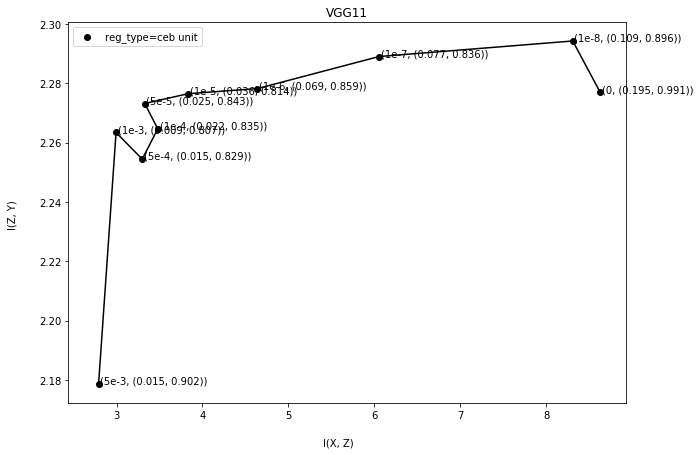

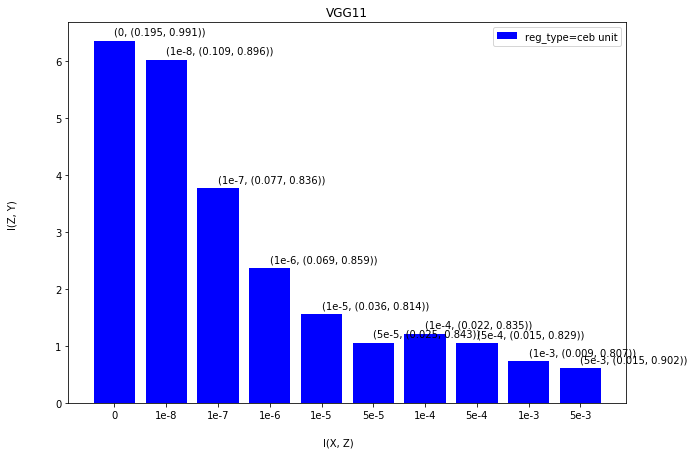

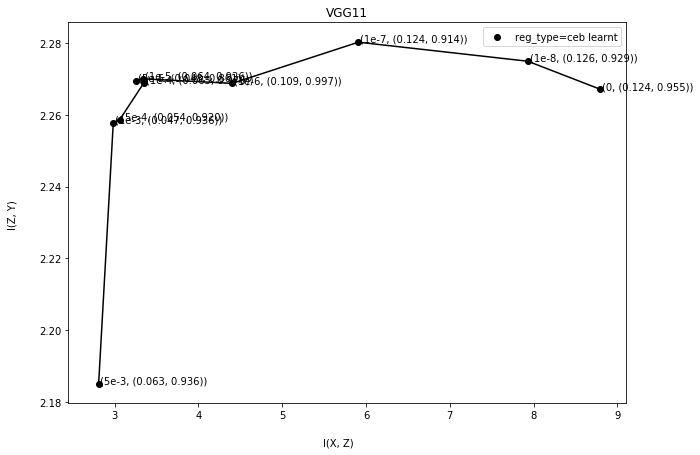

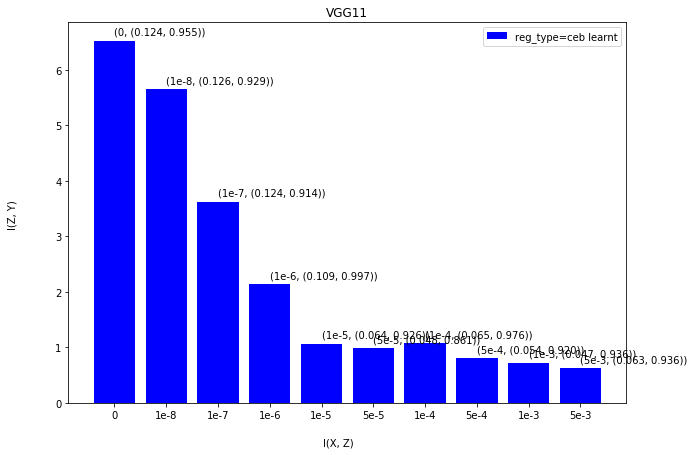

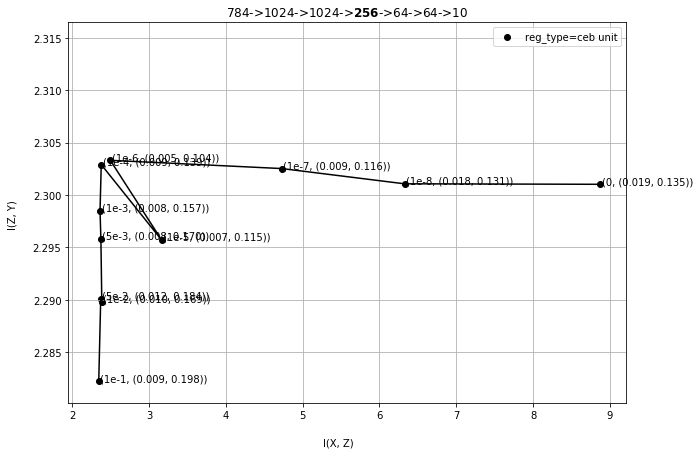

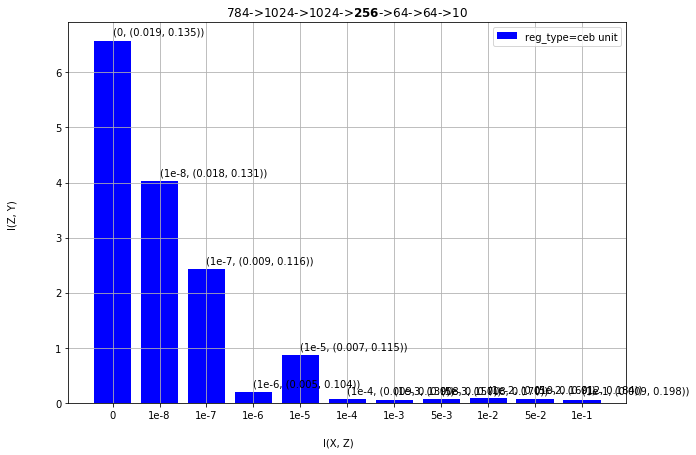

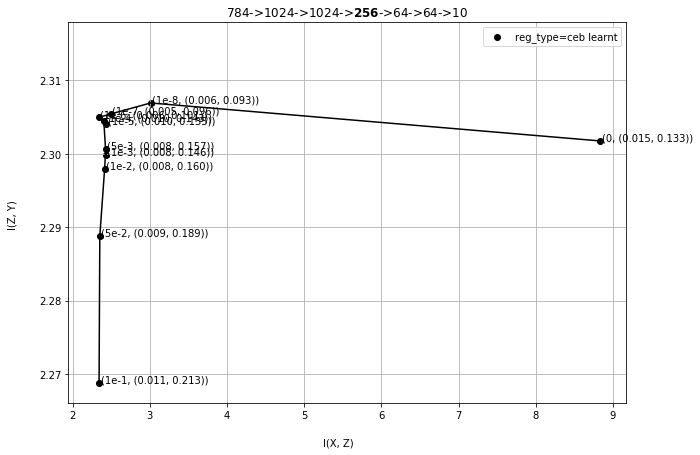

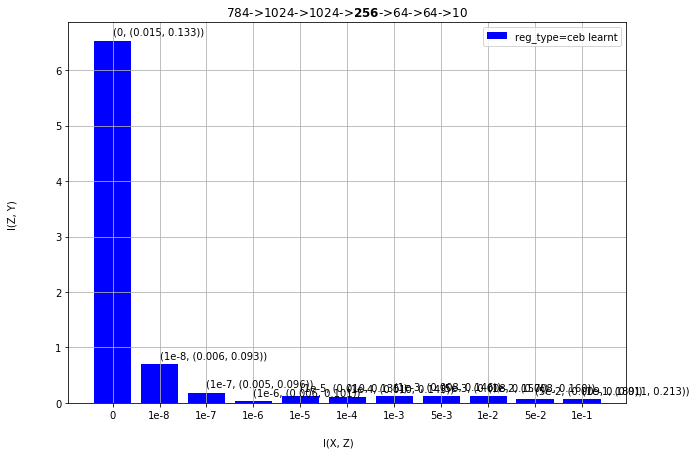

In [247]:
# CVIB

# cvib_vals = ['0', '1e-8', '1e-7', '1e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '1e-2', '5e-2', '1e-1']#, '5e-1', '1'] 
cvib_vals = ['0', '1e-8', '1e-7', '1e-6', '1e-5', '5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '1e-2', '5e-2', '1e-1']#, '5e-1', '1'] 


cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['wd'], title=cifar10_title, comment='unit')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, folder='gap', c=col['dout'], title=cifar10_title, comment='unit')
del(cvib_abc)
del(cvib_mie)

cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['wd'], title=cifar10_title, comment='learnt')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, folder='gap', c=col['dout'], title=cifar10_title, comment='learnt')
del(cvib_abc)
del(cvib_mie)

cvib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
cvib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['wd'], title=mnist12k_title, comment='unit')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='unit')
del(cvib_abc)
del(cvib_mie)


cvib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['wd'], title=mnist12k_title, comment='learnt')
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
_ = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, folder='gap', c=col['dout'], title=mnist12k_title, comment='learnt')



/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


                                             2
0      (4.348662714841109, 2.3574850538112817)
1e-7   (4.638722240960312, 2.3755679387540116)
1e-6    (4.627988307846211, 2.374093562799786)
1e-5  (4.9340685505975825, 2.3794583095373616)
5e-5     (4.506959548523975, 2.37502624590009)
1e-4   (4.462676779916364, 2.3794250830369323)
5e-4  (5.1951990176382505, 2.3727508849236703)
1e-3   (5.4286124315160125, 2.372661218373548)
5e-3   (5.689388491985585, 2.3384806002818395)
                                                2
0     (0.012406529829297344, 0.12086715561903623)
1e-7   (0.01101525949833692, 0.12151897586864788)
1e-6   (0.009086349595121057, 0.1180046011842686)
1e-5   (0.01300302076570553, 0.12432198657027325)
5e-5  (0.008902630988767294, 0.12050305983928085)
1e-4  (0.007933495020726659, 0.12604466082346005)
5e-4  (0.016729802215024167, 0.16171837097461786)
1e-3  (0.008548740125864415, 0.14831335475270302)
5e-3  (0.022175856278579917, 0.20861366658314076)
saved information plane
      

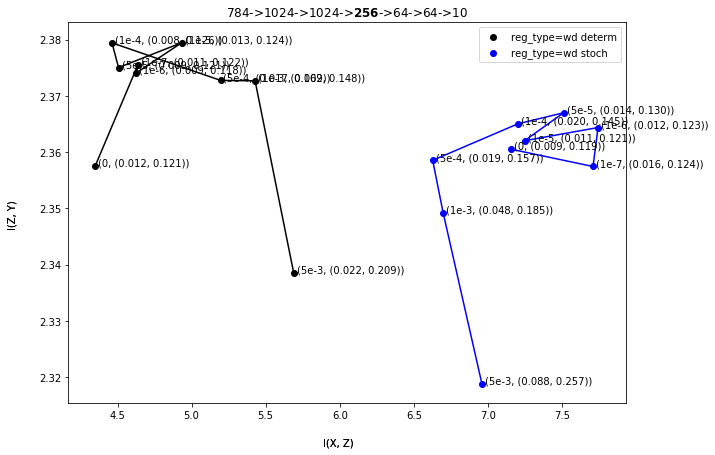

In [226]:
# comparisons
# wd: stoch vs determ

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
wd_abc = make_abc_df(wd_vals, 'mnist12k', layers, 'wd', comment='determ')
wd_mie = make_mie_df(wd_vals, 'mnist12k', layers, 'wd', comment='determ')
print(wd_abc)
# wd_abc = wd_abc.drop(index='5e-5')
# wd_mie = wd_mie.drop(index='5e-5')
fig, ax = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, c=col['wd'], name='comp_wd', loc=1, title=mnist12k_title, comment='determ', tog=True)

wd_abc = make_abc_df(wd_vals, 'mnist12k', layers, 'wd', comment='stoch')
wd_mie = make_mie_df(wd_vals, 'mnist12k', layers, 'wd', comment='stoch')
# wd_abc = wd_abc.drop(index='5e-5')
# wd_mie = wd_mie.drop(index='5e-5')
fig, ax = information_plane(wd_mie, 'mnist12k', wd_abc, 'wd', fig, ax, c=col['dout'], name='comp_wd', loc=1, title=mnist12k_title, comment='stoch', tog=True)

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


MIE experiment for determ with dout (0.4) for mnist12k is missing
MIE experiment for determ with dout (0.475) for mnist12k is missing
                                              2
0       (6.566880129131058, 2.3040218695596093)
0.1      (6.857159304564434, 2.303940120154904)
0.2    (6.5625232511652385, 2.3026055607861937)
0.325   (6.413990142094712, 2.3024883471760482)
0.45     (5.954573684728573, 2.301802107741435)
0.6      (5.15207302316432, 2.2984283778402523)
0.75    (4.755709529459952, 2.1914861764439504)
                                                 2
0      (0.012406529829297344, 0.12086715561903623)
0.1     (0.06849973674933388, 0.20576628406015435)
0.2     (0.06337087799220957, 0.20968795232866672)
0.325   (0.06574690774798493, 0.18925024324505044)
0.45     (0.06283197409397151, 0.1938771946904041)
0.6     (0.09408355360882688, 0.22666589356911754)
0.75       (0.417126909559728, 1.0401622495435627)
saved information plane
MIE experiment for stoch with dout (0.4) for mnist

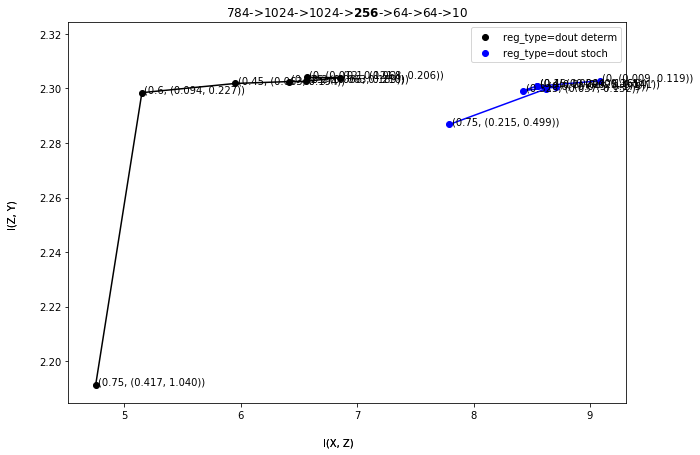

In [227]:
# comparisons
# dout: stoch vs determ

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
dout_abc = make_abc_df(dout_vals, 'mnist12k', layers, 'dout', comment='determ')
dout_mie = make_mie_df(dout_vals, 'mnist12k', layers, 'dout', comment='determ')
print(dout_abc)
# wd_abc = wd_abc.drop(index='5e-5')
# wd_mie = wd_mie.drop(index='5e-5')
fig, ax = information_plane(dout_mie, 'mnist12k', dout_abc, 'dout', fig, ax, c=col['wd'], name='comp_dout', loc=1, title=mnist12k_title, comment='determ', tog=True)

dout_abc = make_abc_df(dout_vals, 'mnist12k', layers, 'dout', comment='stoch')
dout_mie = make_mie_df(dout_vals, 'mnist12k', layers, 'dout', comment='stoch')
# wd_abc = wd_abc.drop(index='5e-5')
# wd_mie = wd_mie.drop(index='5e-5')
fig, ax = information_plane(dout_mie, 'mnist12k', dout_abc, 'dout', fig, ax, c=col['dout'], name='comp_dout', loc=1, title=mnist12k_title, comment='stoch', tog=True)

/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:72: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:76: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
/Users/ntokoven/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: 

MIE experiment for unit with ceb (1e-2) for cifar10 is missing
MIE experiment for unit with ceb (5e-2) for cifar10 is missing
MIE experiment for unit with ceb (1e-1) for cifar10 is missing
                                            2
0      (8.631749499647933, 2.276894659402817)
1e-8   (8.311480691186762, 2.294242573204996)
1e-7  (6.056280671959816, 2.2890026590191286)
1e-6   (4.640843732111361, 2.278211324016253)
1e-5  (3.8332142757513346, 2.276479281191021)
5e-5  (3.327712958120836, 2.2731714026829457)
1e-4  (3.4800880811241024, 2.264643917350347)
5e-4  (3.298609888155125, 2.2544399635053667)
1e-3   (2.99408041996784, 2.2634155024473483)
5e-3    (2.79070595520613, 2.178717729881167)
saved information plane
                                               2
0      (0.19471583415532373, 0.9914383773293785)
1e-8   (0.10885048973712336, 0.8961821011664444)
1e-7   (0.07725091954728205, 0.8356448185234201)
1e-6   (0.06898568947133417, 0.8592776298780143)
1e-5   (0.03601026168631093, 0.81372

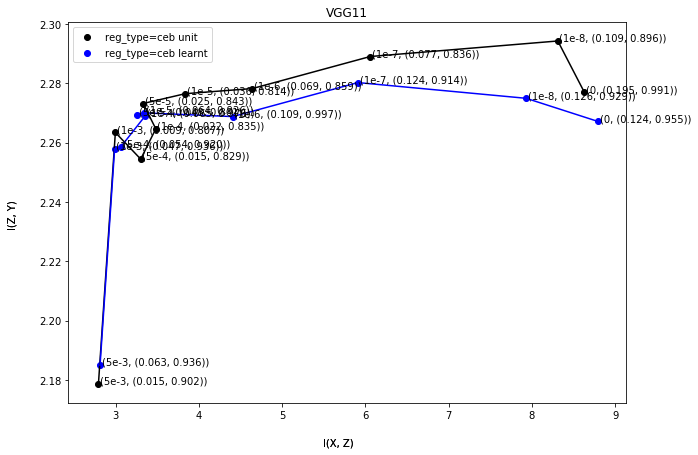

In [251]:
# comparison
# cvib: unit vs learnt

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

cvib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
cvib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
fig, ax = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['wd'], name='comp_cvib', title=mnist12k_title, comment='unit', tog=True)
print(cvib_abc)

cvib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
fig, ax = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['dout'], name='comp_cvib', title=mnist12k_title, comment='learnt', tog=True)
print(cvib_abc)


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
fig, ax = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['wd'], name='comp_cvib', title=cifar10_title, comment='unit', tog=True)
print(cvib_abc)

cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
fig, ax = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['dout'], name='comp_cvib', title=cifar10_title, comment='learnt', tog=True)
print(cvib_abc)


saved information plane
saved information plane


NameError: name 'vib_mie' is not defined

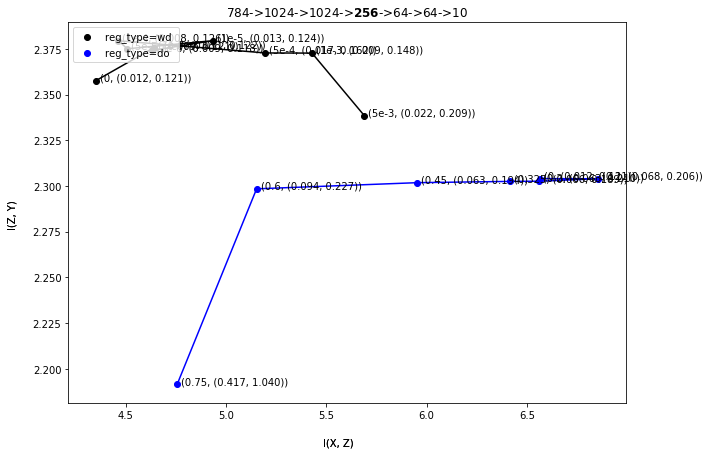

In [198]:
# comparison: cvib (unit) vs vib

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

vib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
vib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='unit')
fig, ax = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['wd'], name='comp_cvib', title=mnist12k_title, comment='unit', tog=True)
print(cvib_abc)

cvib_abc = make_abc_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'mnist12k', layers, 'ceb', comment='learnt')
fig, ax = information_plane(cvib_mie, 'mnist12k', cvib_abc, 'ceb', fig, ax, c=col['dout'], name='comp_cvib', title=mnist12k_title, comment='learnt', tog=True)
print(cvib_abc)


fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='unit')
fig, ax = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['wd'], name='comp_cvib', title=cifar10_title, comment='unit', tog=True)
print(cvib_abc)

cvib_abc = make_abc_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
cvib_mie = make_mie_df(cvib_vals, 'cifar10', layers, 'ceb', comment='learnt')
fig, ax = information_plane(cvib_mie, 'cifar10', cvib_abc, 'ceb', fig, ax, c=col['dout'], name='comp_cvib', title=cifar10_title, comment='learnt', tog=True)
print(cvib_abc)

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

fig, ax = information_plane(wd_mie, wd_abc, 'wd', fig, ax, c=col['wd'], name='allin1', loc=2, title=cifar10_title)
fig, ax = information_plane(do_mie, do_abc, 'do', fig, ax, c=col['dout'], name='allin1', loc=2, title=cifar10_title)
fig, ax = information_plane(vib_mie, vib_abc, 'vib', fig, ax, c=col['vib'], name='allin1', loc=2, title=cifar10_title)




